In [1]:
import nest_asyncio
nest_asyncio.apply()
import cmdstanpy as sp
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
plt.ioff()
from cycler import cycler
import matplotlib.patches as mpatches
import seaborn as sns
import arviz as az
import scipy.stats as stats
import ROOT as r
import time
import seaborn as sns
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["ytick.minor.visible"] =  True
plt.rcParams["mathtext.fontset"]="cm"
plt.rcParams['errorbar.capsize'] = 3
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=22
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle']=':'
plt.rcParams['grid.color']='black'
plt.rcParams['axes.prop_cycle'] = cycler(color=['black', 'red', 'blue', 'green'])

import arviz as az
import warnings
warnings.filterwarnings('ignore')
%jsroot on

Welcome to JupyROOT 6.26/00


In [2]:
sigma_df=pd.read_csv('sigma.csv',index_col=0)
diagnostics_df=pd.read_csv('diagnostics.csv',index_col=0)

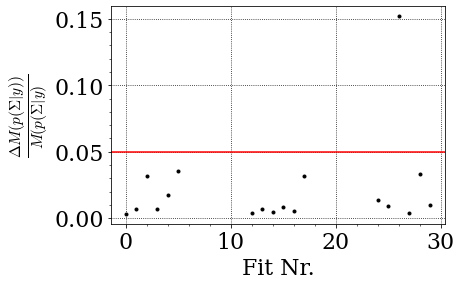

In [4]:
fig, ax = plt.subplots()
ax.plot(np.arange(132),np.abs(np.array(diagnostics_df.loc[['mcse']])[0]/np.array(diagnostics_df.loc[['sigma_median']])[0]),'.')
ax.set_xlabel('Fit Nr.')
ax.set_ylabel('$\\frac{\Delta M(p(\Sigma|y))}{M(p(\Sigma|y)}$')
#ax.set_ylim([0,0.5])
ax.axhline(y=0.05,color='red')
plt.show()
fig.savefig('./plots/mcse.pdf',format='pdf',bbox_inches='tight',dpi=1000)

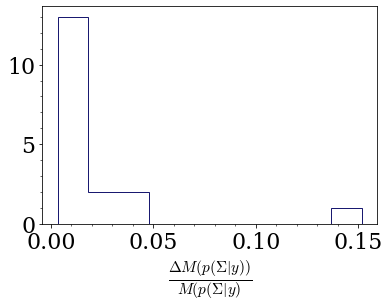

In [5]:
plt.hist(np.abs(np.array(diagnostics_df.loc[['mcse']])[0]/np.array(diagnostics_df.loc[['sigma_median']])[0]),histtype='step',color='midnightblue')
plt.xlabel('$\\frac{\Delta M(p(\Sigma|y))}{M(p(\Sigma|y)}$')
plt.grid(False)
plt.savefig('./plots/mcse_hist.pdf',bbox_inches='tight')
plt.show()

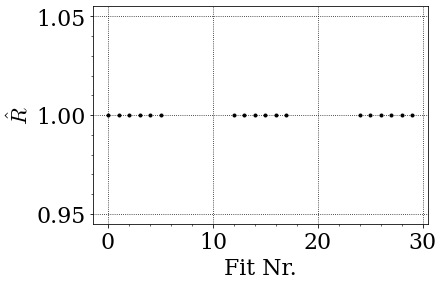

In [6]:
fig, ax = plt.subplots()
ax.plot(np.arange(132),np.array(diagnostics_df.loc[['rhat']])[0],'.')
ax.set_xlabel('Fit Nr.')
ax.set_ylabel('$\hat{R}$')
plt.show()
fig.savefig('rhat.pdf',format='pdf',dpi=1000)

In [19]:
fig,ax = plt.subplots(1,3,sharey='row',dpi=1000,figsize=(10,7))
plt.subplots_adjust(wspace=0, hspace=0)
#ax[2,2].get_xaxis().set_visible(True)
#ax[2,2].xaxis.set_tick_params(which='both', labelbottom=True)
#farahs_data=pd.read_csv('../realdeal/Sigma_eta_datapoints_final_newsyserrorcalc.txt',sep=' ',header=None)
#farahs_data.columns=['W','egamma','costheta','sigma','stat_error','sys_error','idk']
counter=0
for i in range(1):
    for j in range(3):
        if(j==0 and i==0):
            ax[j].set_ylabel('$\Sigma$')
        if(j>0 and (i==2 or i==3)):
            ax[j].set_xlabel('$\cos\\theta_{\eta}^{\mathrm{CMS}}$')
        ax[j].set_xlim([-1.2,1.2])
        ax[j].set_ylim([-1.5,1.5])
        x=[-1+2/6/2+(i)*2/6 for i in range(6)]

        if(counter<11):
            #sigma (point estimate) from event yield asymmetries
            #ax[i][j].errorbar(x=np.arange(-1,1,2/12),
            #                  y=[sigma_chi2_df[f"ebin{counter:02d}costbin{j:02d}"]['sigma']for j in range(12)],
            #                  yerr=[sigma_chi2_df[f"ebin{counter:02d}costbin{j:02d}"]['error'] for j in range(12)],
            #                  fmt='s',markersize=4.,color='peachpuff',label='$\chi^2 - fit$')
            #sigma (point estimate) from event based fit
            #ax[i][j].errorbar(x=np.arange(-1,1,2/12),y=farahs_data['sigma'][counter*12:counter*12+12],
            #                  yerr=farahs_data['stat_error'][counter*12:counter*12+12],
            #                  fmt='v',markersize=4.,color='darkorange',label='Event based fit')
            #plot sigma posterior obtained from event based fit
            vp=ax[j].violinplot([sigma_df[f"ebin{counter:02d}costbin{j:02d}"] for j in range(6)],x,
                                showmeans=False, showextrema=False, showmedians=False,widths=0.5)
            #sigma posterior obtained from event yield asymmetries
            #vpalt=ax[i][j].violinplot([sigma_alt_df[f"ebin{counter:02d}costbin{j:02d}"] for j in range(12)],
            #                          np.arange(-1,1,2/12),
            #                    showmeans=False, showextrema=False, showmedians=False,widths=0.3)
            ax[j].text(0,1,f'${1500+counter*100}$ MeV $\leq E_\gamma < {1500+(counter+1)*100}$ MeV',
                          fontsize=14,ha='center',va='center')
            #cosmetics
            for b in vp['bodies']:
                # get the center
                m = np.mean(b.get_paths()[0].vertices[:, 0])
                # modify the paths to not go further right than the center
                b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
                b.set_alpha(.5)
                b.set_color('navy')
            #for b in vpalt['bodies']:
            #    # get the center
            #    m = np.mean(b.get_paths()[0].vertices[:, 0])
            #    # modify the paths to not go further right than the center
            #    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
            #    b.set_alpha(.2)
            #    b.set_color('navy')    
        counter+=1
lines,labels = ax[0].get_legend_handles_labels() 
patch = mpatches.Patch(color='navy', label='bayesian fit (event based)',alpha=.5)
#patch = mpatches.Patch(color='navy', label='bayesian fit (event yield asymmetries)',alpha=.1)

lines.append(patch)
#lines.append(patch1)

plt.legend(handles=lines,bbox_to_anchor=(1.4,-0.1))        
plt.show()
fig.savefig(f'./sigma_etap.pdf',format='pdf',bbox_inches='tight',dpi=1000)